# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Diego Felipe Diaz Perez

Identificación: 1021673655

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [63]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

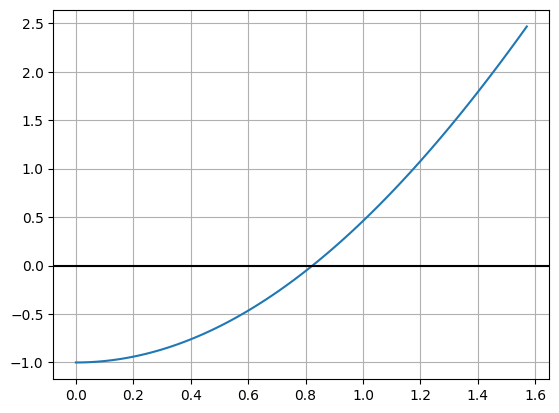

In [64]:
#a
def steffensen(f,x0,tol=1e-4,m=100): #defino la funcion
# le entran una funcion f, un punto x0, la tolerancia y el maximo de iteraciones
  for i in range(1,m+1):
    y=x0+f(x0) #definimos yn
    if f(y)==f(x0): # vemos que no se cumpla que f(y)=f(x)
      return print("f(y) y f(x) son iguales por lo que no se puede continuar")
    x=x0-((f(x0)**2)/(f(y)-f(x0))) #definimos xn+1
    if abs(x-x0)<tol: #vemos si se cumple el criterio de parada
      return x, i
    else:
      x0=x  # convertimos xn en xn+1
  return print("maximo de iteraciones alcanzado", x)# en caso de alcanzar el maximo de iteraciones devolvemos este mensaje
#b.1 la parte de la grafica
f=lambda x: x**2-np.cos(x) #definimos f(x)=0
x=np.linspace(0,np.pi/2,100) #hacemos un array con 0<x<π/2 con 100 valores
plt.plot(x,f(x)) #hacemos la grafica
plt.grid() #añadimos cuadricula
plt.axhline(0,color="black") # hacemos una linea horizontal en 0 para poder ver mas o menos donde es la raiz

In [65]:
#b.2 la parte de pandas
valores={"x":x,"f(x)":f(x)} #creamos un diccionario con los valores de x y f(x)
v=pd.DataFrame(valores) #creamos el dataframe
v["abs_f(x)"]=v["f(x)"].abs()
menor_valores = v.nsmallest(5, "abs_f(x)")
print(menor_valores)

           x      f(x)  abs_f(x)
52  0.825065  0.002222  0.002222
51  0.809198 -0.035277  0.035277
53  0.840931  0.040397  0.040397
50  0.793331 -0.072100  0.072100
54  0.856798  0.079242  0.079242


In [66]:
# c
ste=steffensen(f,1,1e-10)
bis=bisect(f,0.6,1)
sec=root_scalar(f,method="secant",x0=0.6,x1=1).root
print("steffensen:",ste) #vemos el valor con el metodo de steffensen
print("biseccion:", bis) #vemos el valor con el metodo de biseccion
print("secante:", sec) #vemos el valor con el metodo de la secante
err_est=(abs(steffensen(f,1,1e-10)[0]-sec)/sec)*100 #haremos el erro de steffensen y biseccion tomando a secante comoel valor real
err_bis=(abs(bis-sec)/sec)*100
print("error de steffensen:",err_est,"%")
print("error de biseccion:",err_bis,"%")


steffensen: (np.float64(0.8241323123025224), 6)
biseccion: 0.8241323123031179
secante: 0.8241323123025225
error de steffensen: 1.3471417247593806e-14 %
error de biseccion: 7.224721069884557e-11 %


<ipython-input-67-eb6d82e945f4>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


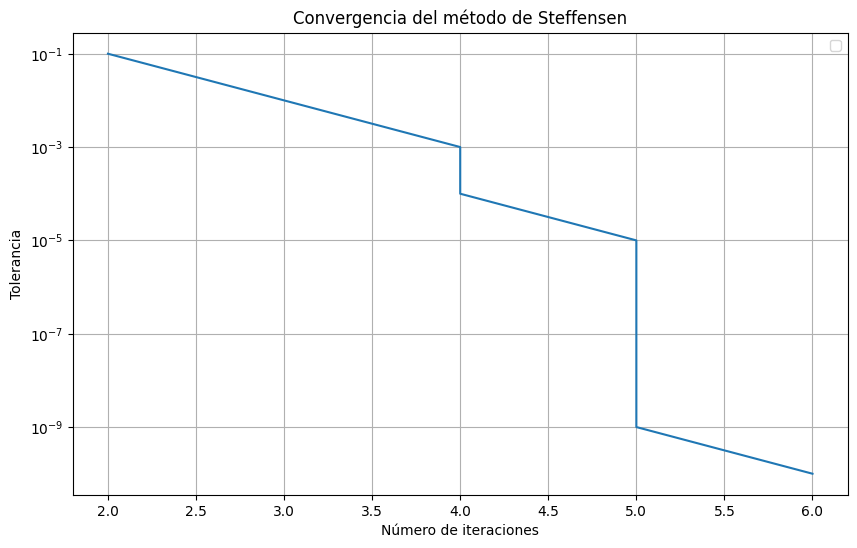

In [67]:
#d
tolerancias=np.logspace(-1, -10, 10)
iteraciones=[]
for tol in tolerancias:
    n= steffensen(f, 1, tol)[1]
    iteraciones.append(n)
plt.figure(figsize=(10, 6))
plt.semilogy(iteraciones,tolerancias)
plt.xlabel("Número de iteraciones")
plt.ylabel("Tolerancia")
plt.title("Convergencia del método de Steffensen")
plt.grid()
plt.legend()
#el metodo de steffensen converge muy rapido pues para una tolerancia de 1e-10 solo le toma 6 iteraciones

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [68]:
#parte A
# a
def doble_factorial(n): #funcion del doble factorial
  if n <= 0:
    return 1
  else:
    res=1
    for i in range(1,n+1,2):
      res *=1
    return res
def coeficiente_cn(n):
  numerador = doble_factorial(n)
  denominador = (2 ** n * factorial(n))
  return (numerador / denominador) ** 2
#b
l=1.2
g=9.8
t0=2*np.pi*((l/g)**(1/2))
def t(o,n=4):
  sum = 0
  for n in range(1,n+ 1):
    cn = coeficiente_cn(n)
    sum += cn * np.sin(o/ 2) ** (2 * n)
  t0=2*np.pi*((l/g)**(1/2))
  T = t0 * (1 + sum)
  return T
print("aprox 90°:", t0)
print("serie 90°:",t(90,3))
print("aprox 15°:", t0)
print("serie 15°:",t(15,3))
#c
ter10_90=t(90,10)
ter10_15=t(15,10)
err_t090=(abs(t0-ter10_90)/ter10_90)*100
err_t015=(abs(t0-ter10_15)/ter10_15)*100
err_t90=(abs(t(90,3)-ter10_90)/ter10_90)*100
err_t15=(abs(t(15,3)-ter10_15)/ter10_15)*100
print("error t0 para 90°:", err_t090,"%")
print("error t0 para 15°:", err_t015,"%")
print("error para aprox en 90°:",err_t90,"%")
print("error para aprox en 15°:",err_t15,"%")
#la aproximacion de la serie es mucho mejor que la de t0 sobre todo para angulos grandes

aprox 90°: 2.1986568517060525
serie 90°: 2.6150055613322554
aprox 15°: 2.1986568517060525
serie 15°: 2.7095198693385343
error t0 para 90°: 15.921655621367146 %
error t0 para 15°: 18.854644260883752 %
error para aprox en 90°: 0.00015783857835589376 %
error para aprox en 15°: 0.00033269899554664987 %


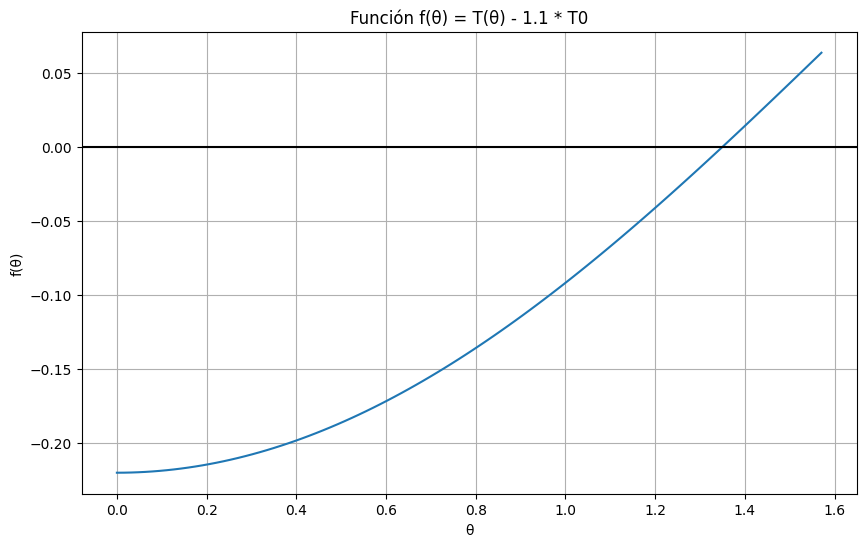

In [69]:
#parte B
#a
def f(o):
  f=t(o,4)-1.1*t0
  return f
o=np.linspace(0,np.pi/2,100)
f_val = [f(theta) for theta in o]
plt.figure(figsize=(10, 6))
plt.plot(o, f_val)
plt.axhline(0, color="black")
plt.xlabel("θ")
plt.ylabel("f(θ)")
plt.title("Función f(θ) = T(θ) - 1.1 * T0")
plt.grid()

In [70]:
#b
print("biseccion:", bisect(f,1,1.6))
print("newton:", newton(f,1))

biseccion: 1.3497438850117762
newton: 1.3497438850113
